In [39]:
#Predict AAPL Stock Prices using LSTM

In [40]:
import math
import pandas_datareader as web
import numpy as np 
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [41]:
#get the stock quote
#https://finance.yahoo.com/quote/AAPL/history?period1=1262318400&period2=1577937599&interval=1d&frequency=1d&filter=history
from google.colab import drive 
drive.mount('/content/gdrive')
df=pd.read_csv('gdrive/MyDrive/AAPL.csv')
df

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


,Date,Open,High,Low,Close,Adj Close,Volume
0,2010-01-04,7.622500,7.660714,7.585000,7.643214,6.562591,493729600
1,2010-01-05,7.664286,7.699643,7.616071,7.656429,6.573935,601904800
2,2010-01-06,7.656429,7.686786,7.526786,7.534643,6.469369,552160000
3,2010-01-07,7.562500,7.571429,7.466071,7.520714,6.457407,477131200
4,2010-01-08,7.510714,7.571429,7.466429,7.570714,6.500339,447610800
...,...,...,...,...,...,...,...
2511,2019-12-24,71.172501,71.222504,70.730003,71.067497,70.129517,48478800
2512,2019-12-26,71.205002,72.495003,71.175003,72.477501,71.520905,93121200
2513,2019-12-27,72.779999,73.492500,72.029999,72.449997,71.493759,146266000
2514,2019-12-30,72.364998,73.172501,71.305000,72.879997,71.918083,144114400


In [42]:
#get the number of rows and columns in dataset
df.shape

(2516, 7)

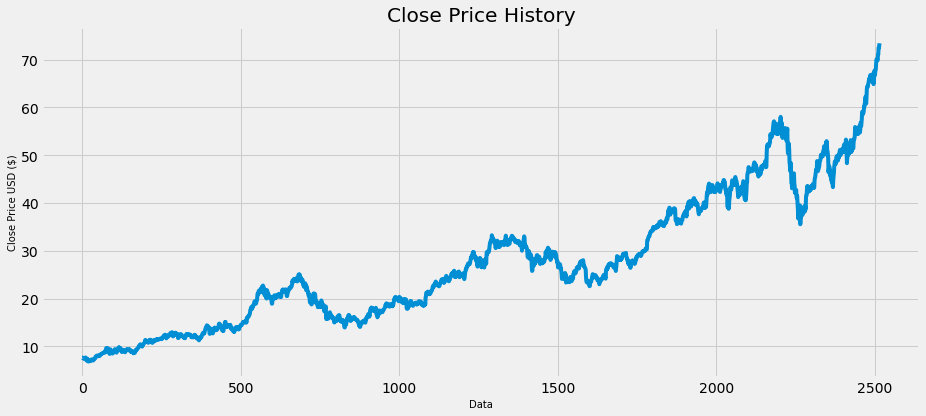

In [43]:
#visualize the closing price history
plt.figure(figsize=(14,6))
plt.title('Close Price History')
plt.plot(df['Close'])
plt.xlabel('Data', fontsize=10)
plt.ylabel('Close Price USD ($)', fontsize=10)
plt.show()

In [44]:
#create a new df with only the 'Close column'
data = df.filter(['Close'])
#convert the df to numpy array
dataset = data.values
#get the number of rows to train the model on 
training_data_len = math.ceil( len(dataset)* .8)

In [45]:
#scale the data
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)
scaled_data

array([[0.01178427],
       [0.01198283],
       [0.01015293],
       ...,
       [0.98553795],
       [0.99199891],
       [1.        ]])

In [46]:
#create the training dataset
#create the scaled training dataset
train_data = scaled_data[0:training_data_len, :]
#Split the data into x_train and y_train
x_train = []
y_train = []

for i in range(60, len(train_data)):
  x_train.append(train_data[i-60:i, 0])
  y_train.append(train_data[i, 0])

In [47]:
x_train[0]

array([1.17842666e-02, 1.19828284e-02, 1.01529341e-02, 9.94364404e-03,
       1.06949186e-02, 9.69144119e-03, 8.40889540e-03, 9.98120777e-03,
       9.32653214e-03, 7.44834586e-03, 1.23369943e-02, 1.05607710e-02,
       8.59671402e-03, 3.05875407e-03, 5.91359721e-03, 7.45370996e-03,
       8.49476607e-03, 3.88515603e-03, 5.36410001e-06, 1.43814977e-03,
       2.04453348e-03, 3.85295641e-03, 0.00000000e+00, 1.82987933e-03,
       1.11080444e-03, 2.22162391e-03, 1.64742480e-03, 3.55244660e-03,
       4.47008334e-03, 6.09068764e-03, 5.63455883e-03, 5.83846976e-03,
       5.16232270e-03, 4.49153974e-03, 2.68848091e-03, 4.62033824e-03,
       5.33941313e-03, 6.74536327e-03, 9.09042158e-03, 9.01529413e-03,
       9.27286108e-03, 1.00134074e-02, 1.44351988e-02, 1.45049622e-02,
       1.66192590e-02, 1.75959159e-02, 1.79500817e-02, 1.85403731e-02,
       1.70592955e-02, 1.73866258e-02, 1.72095504e-02, 1.74939529e-02,
       1.62060580e-02, 1.75476239e-02, 1.94848303e-02, 2.00268298e-02,
      

In [48]:
y_train[0]

0.02304802015951994

In [49]:
y_train

[0.02304802015951994,
 0.023568548217151222,
 0.02492084233679491,
 0.02548429821997976,
 0.026053118203172562,
 0.025704316473245795,
 0.02669170153744875,
 0.02696001171627628,
 0.027035139167367564,
 0.028784541967989727,
 0.030517837443097925,
 0.02970216368110927,
 0.029525088278887043,
 0.02819425055927506,
 0.036045069198317556,
 0.03993560435504219,
 0.042275283538888805,
 0.041561572753521334,
 0.03755834642015972,
 0.037322235866869904,
 0.041100079846957585,
 0.037048561588034476,
 0.0398712051039667,
 0.035755287593968135,
 0.03431177372320936,
 0.029085051772355,
 0.02350951306608369,
 0.03323851798240905,
 0.03459619122755088,
 0.03758518194568951,
 0.03558357629175381,
 0.03314729823129396,
 0.03336195238455207,
 0.03236382409484308,
 0.030206599438716827,
 0.024529112781314574,
 0.026976119041790272,
 0.029358726051190456,
 0.028532324089186004,
 0.027936668580463356,
 0.03289508035249021,
 0.03478937395528707,
 0.03690903488586768,
 0.0385833102353985,
 0.0381379096288

In [50]:
#convert the x_train and y_train to numpy arrays
x_train, y_train = np.array(x_train), np.array(y_train)
y_train

array([0.02304802, 0.02356855, 0.02492084, ..., 0.53777842, 0.53958145,
       0.53263214])

In [51]:
#reshape the data for LSTM model
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
x_train.shape

(1953, 60, 1)

In [52]:
#build the LSTM model
model = Sequential()
model.add(LSTM(50, return_sequences=1, input_shape = (x_train.shape[1], 1)))
model.add(LSTM(50, return_sequences=0))
model.add(Dense(25))
model.add(Dense(1))

In [53]:
#compile the model
model.compile(optimizer='adam', loss= 'mean_squared_error')

In [54]:
#train the model
model.fit(x_train, y_train, batch_size=1, epochs= 1)

1953/1953 [==============================] - 53s 26ms/step - loss: 4.8636e-04


In [55]:
#create test dataset
#create a new array containing scaled values from index 1543 to 2003
test_data= scaled_data[training_data_len - 60:, : ]
#create the datasets x_test, y_test
x_test = [] 
y_test = dataset[training_data_len:, :]
for i in range(60, len(test_data)):
  x_test.append(test_data[i-60:i, 0])

In [56]:
#convert the data to numpy array
x_test = np.array(x_test)

In [57]:
#reshape the data for LSTM model
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))
x_test.shape

(503, 60, 1)

In [58]:
#get the models predicted values 
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions) #unscale

In [59]:
#model evaluation (RMSE)
rmse = np.sqrt(np.mean((predictions - y_test)**2))
rmse

1.7244584080325103

In [60]:
#show the valid and predicted prices
valid

,Close,Predictions
2013,43.064999,43.589260
2014,43.057499,43.508064
2015,43.257500,43.480621
2016,43.750000,43.508049
2017,43.587502,43.618835
...,...,...
2511,71.067497,68.415657
2512,72.477501,68.696129
2513,72.449997,69.110596
2514,72.879997,69.518631


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


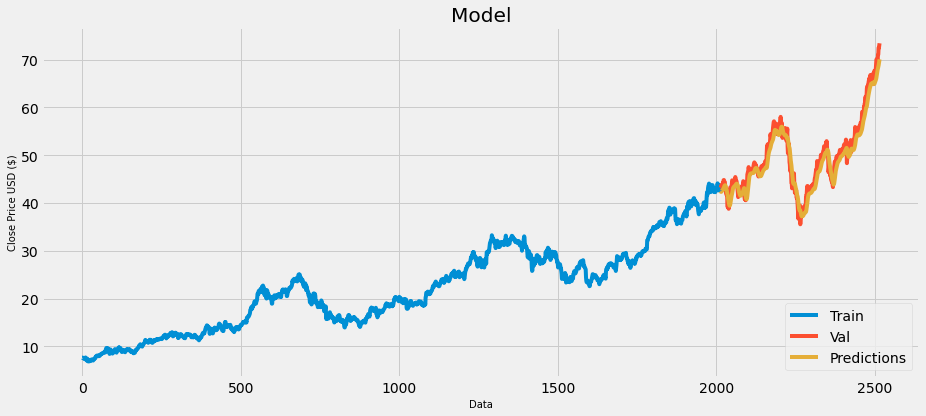

In [61]:
#plot the data
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions
#visualize the data
plt.figure(figsize=(14,6))
plt.title('Model')
plt.xlabel('Data', fontsize=10)
plt.ylabel('Close Price USD ($)', fontsize=10)
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show()

In [62]:
#The LSTM model do so well. 